# Notes
- We reproduce the score distribution approaches by Noah Hollmann and Carsten Eickhoff [1].
- We compare our results with that in [1,2].

[1] Noah Hollmann and Carsten Eickhoff. 2017. Ranking and Feedback-based Stopping for Recall-Centric Document Retrieval. In CLEF (Working Notes).

[2] Evangelos Kanoulas, Dan Li, Leif Azzopardi, and Rene Spijker. 2017. CLEF 2017 technologically assisted reviews in
empirical medicine overview. In CEUR Workshop Proceedings, Vol. 1866. 1–29.

In [14]:
import os
import re
import glob
import subprocess
import pandas as pd
from IPython.display import Image

In [15]:
root_dir = os.path.abspath('../..')
tar_master_dir = os.path.join(root_dir, 'tar-master')
data_dir = os.path.join(root_dir, 'baseline_reproduction', 'score-distribution', 'data')
ret_dir = os.path.join(root_dir, 'baseline_reproduction', 'score-distribution', 'ret')

clef2017_test_30_topics = [
'CD007431',
'CD008803',
'CD008782',
'CD009647',
'CD009135',
'CD008760',
'CD010775',
'CD009519',
'CD009372',
'CD010276',
'CD009551',
'CD012019',
'CD008081',
'CD009185',
'CD010339',
'CD010653',
'CD010542',
'CD010896',
'CD010023',
'CD010772',
'CD011145',
'CD010705',
'CD010633',
'CD010173',
'CD009786',
'CD010386',
'CD010783',
'CD010860',
'CD009579',
'CD009925'
]

# Results in paper [1,2]
- ETH runs were generated through the score distribution approaches.
- We make sure that the downloaded dataset is correct, by comparing the result of the downloaded runs in `tar_master` with that reported in [2].

In [21]:
def eval_run(runfile):
    print('============Result of {}==============='.format(os.path.basename(runfile)))
    
    script = os.path.join(tar_master_dir, 'scripts/tar_eval.py')
    qrelfile = os.path.join(tar_master_dir, '2017-TAR/testing/qrels/qrel_abs_test.txt')

    ret = subprocess.check_output(['python', script, qrelfile, runfile])
    ret = subprocess.check_output([' tail -28 '], shell=True, input=ret)

    print(ret.decode(encoding='utf-8'))
    return

In [22]:
eval_run(os.path.join(tar_master_dir, '2017-TAR/participant-runs/ETH','trec_final_old_m1')) 

============Result of trec_final_old_m1===============
ALL	topic_id	ALL
ALL	num_docs	117562
ALL	num_rels	1857
ALL	num_shown	51640
ALL	num_feedback	0
ALL	rels_found	1686
ALL	last_rel	1372.3
ALL	wss_100	0.24
ALL	wss_95	0.276
ALL	NCG@10	0.505
ALL	NCG@20	0.708
ALL	NCG@30	0.808
ALL	NCG@40	0.861
ALL	NCG@50	0.881
ALL	NCG@60	0.896
ALL	NCG@70	0.904
ALL	NCG@80	0.908
ALL	NCG@90	0.908
ALL	NCG@100	0.908
ALL	total_cost	1721.333
ALL	total_cost_uniform	2306.165
ALL	total_cost_weighted	4740.518
ALL	norm_area	0.815
ALL	ap	0.218
ALL	r	0.927
ALL	loss_e	0.184
ALL	loss_r	0.013
ALL	loss_er	0.197



In [23]:
eval_run(os.path.join(tar_master_dir, '2017-TAR/participant-runs/ETH','trec_final_old_m2')) 

============Result of trec_final_old_m2===============
ALL	topic_id	ALL
ALL	num_docs	117562
ALL	num_rels	1857
ALL	num_shown	51604
ALL	num_feedback	5063
ALL	rels_found	1702
ALL	last_rel	1435.467
ALL	wss_100	0.138
ALL	wss_95	0.245
ALL	NCG@10	0.505
ALL	NCG@20	0.711
ALL	NCG@30	0.815
ALL	NCG@40	0.873
ALL	NCG@50	0.902
ALL	NCG@60	0.912
ALL	NCG@70	0.916
ALL	NCG@80	0.917
ALL	NCG@90	0.917
ALL	NCG@100	0.917
ALL	total_cost	2057.667
ALL	total_cost_uniform	2676.622
ALL	total_cost_weighted	4720.412
ALL	norm_area	0.803
ALL	ap	0.215
ALL	r	0.897
ALL	loss_e	0.121
ALL	loss_r	0.021
ALL	loss_er	0.142



In [24]:
eval_run(os.path.join(tar_master_dir, '2017-TAR/participant-runs/ETH','trec_final_old_m4')) 

============Result of trec_final_old_m4===============
ALL	topic_id	ALL
ALL	num_docs	117562
ALL	num_rels	1857
ALL	num_shown	27046
ALL	num_feedback	0
ALL	rels_found	1406
ALL	last_rel	785.033
ALL	wss_100	0.122
ALL	wss_95	0.163
ALL	NCG@10	0.489
ALL	NCG@20	0.666
ALL	NCG@30	0.716
ALL	NCG@40	0.737
ALL	NCG@50	0.751
ALL	NCG@60	0.756
ALL	NCG@70	0.757
ALL	NCG@80	0.757
ALL	NCG@90	0.757
ALL	NCG@100	0.757
ALL	total_cost	901.533
ALL	total_cost_uniform	2527.517
ALL	total_cost_weighted	5590.713
ALL	norm_area	0.744
ALL	ap	0.207
ALL	r	0.816
ALL	loss_e	0.088
ALL	loss_r	0.056
ALL	loss_er	0.144



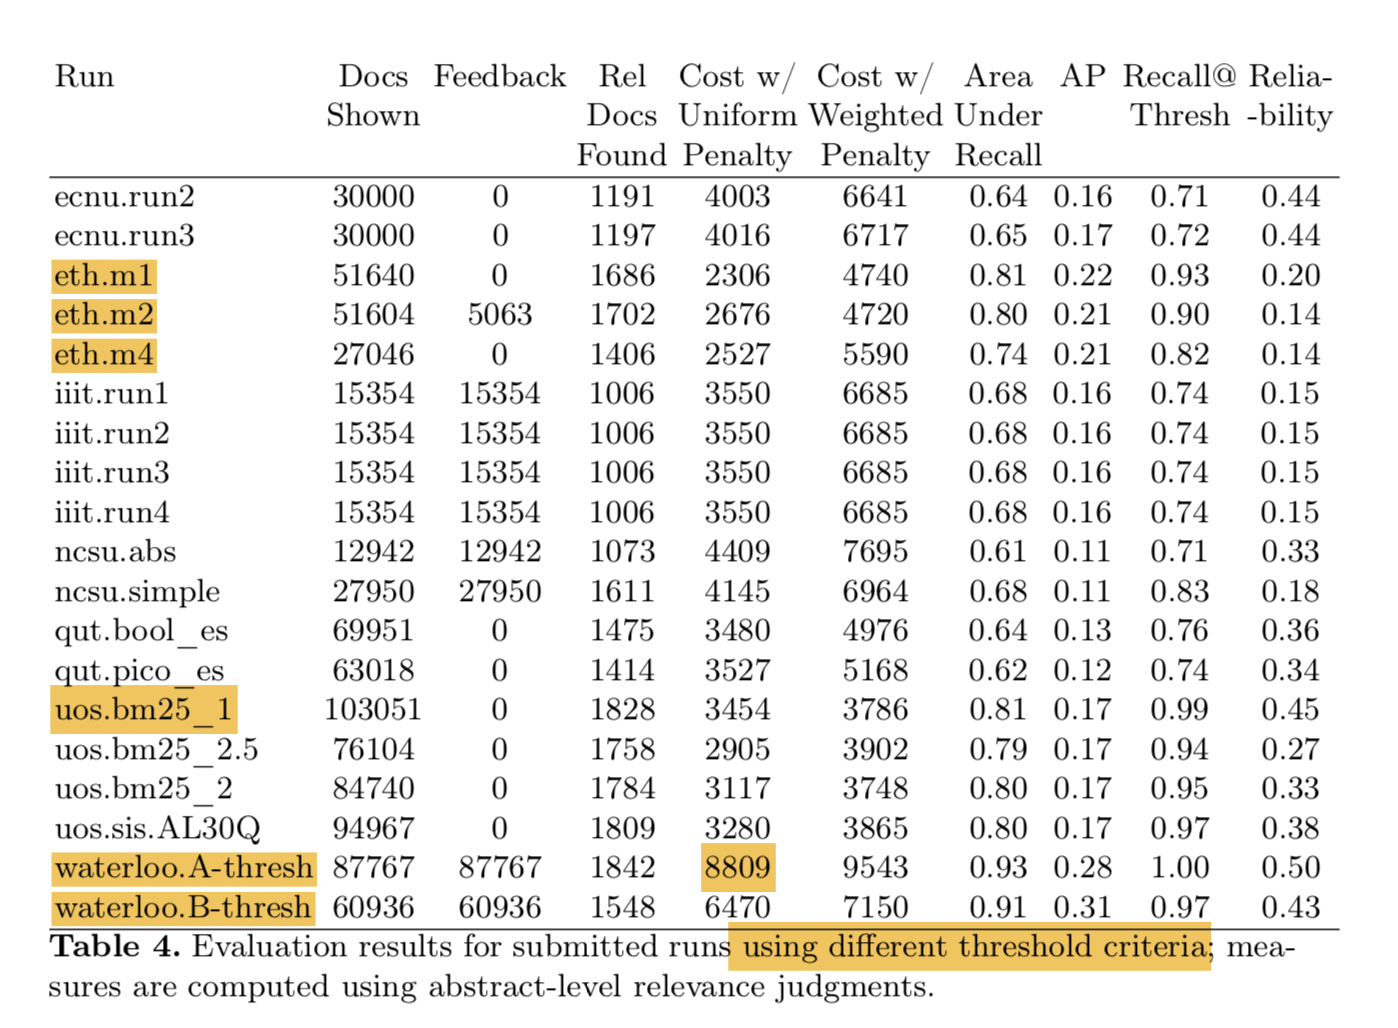

In [20]:
Image(filename='./images/table4.png', width=400)

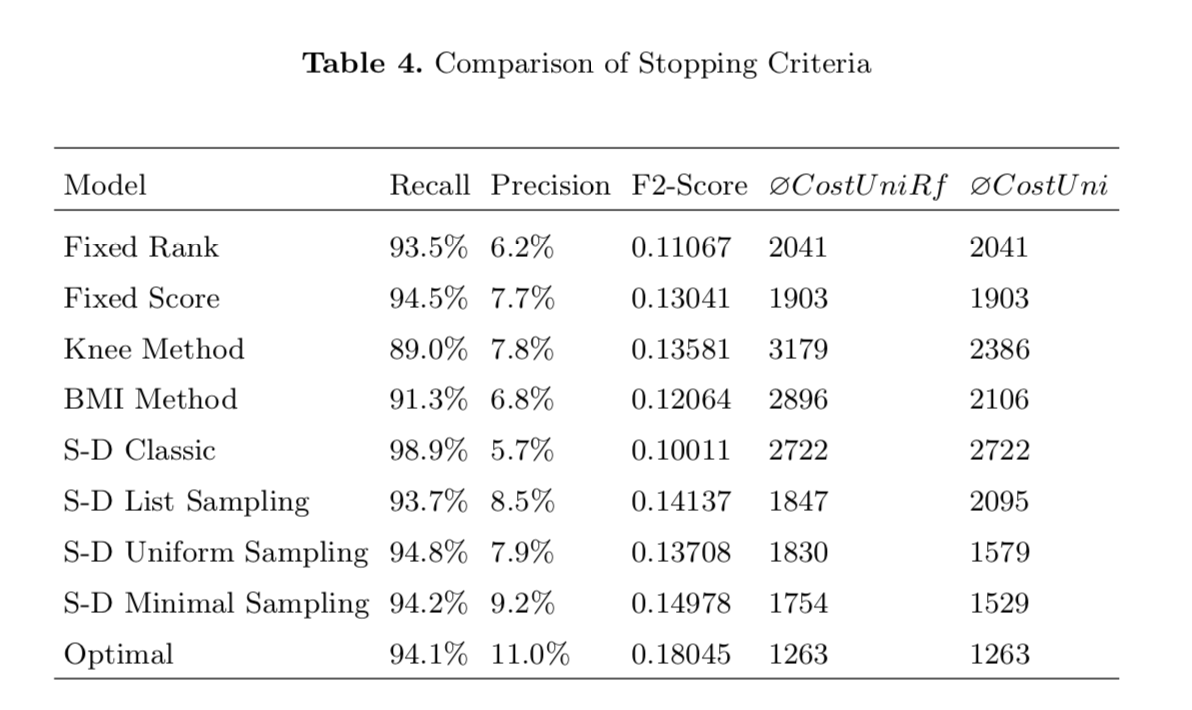

In [25]:
Image(filename='./images/ethtable4.png', width=400)

# Reproduce SD 
- We reproduce the **SD-training** and **SD-sampling** in [1].



In [18]:
def check_file(filepath):
    if not os.path.exists(filepath):
        print('not existing file {}'.format(filepath))
    if os.path.getsize(filepath) == 0:
        print('zero byte file {}'.format(filepath))


def tar_eval(model_name, topic_id):
    
    # run file
    runfile = os.path.join(ret_dir, model_name, '1', 'test', topic_id + '.run')
    check_file(runfile)
    
    # qrel file
    qrelfile = os.path.join(data_dir, 'qrels', topic_id)
    check_file(qrelfile)
    
    # tar eval script
    script = os.path.join(tar_master_dir, 'scripts/tar_eval.py')
    
    # result
    ret = subprocess.check_output(['python', script, qrelfile, runfile])
    ret = subprocess.check_output([' tail -27 '], shell=True, input=ret)
    ret = ret.decode(encoding='utf-8')
   
    # dataframe
    dct = {}
    for line in ret.split('\n'):
      if line != '':
            tid, key, val = line.split()
            if tid == 'ALL':
                dct[key] = [float(val)]
    
    df = pd.DataFrame(dct)
    df['model_name'] = [model_name]
    df['topic_id'] = [topic_id]
    df['recall'] = float(df['rels_found']) / float(df['num_rels'])
    df['cost'] = float(df['num_shown']) / float(df['num_docs'])
    df['precision'] = float(df['num_rels']) / float(df['num_shown'])
    return df


## SD-training
- For SD-training we achieved a recall of 0.994 and precision of 0.042, while the metrics reported are 0.989 and 0.057.

In [16]:
dfs = []
for topic_id in clef2017_test_30_topics:
    for target_recall in [0.8, 0.9, 0.99]:
        _df = tar_eval(model_name='sdtf_tr{}'.format(str(target_recall)), topic_id=topic_id)
        _df['tr'] = target_recall
        dfs.append(_df)
df = pd.concat(dfs, ignore_index=True)
df['reliability'] = df.apply(lambda row:1 if row['recall'] >= row['tr'] else 0, axis=1)
df1 = df.groupby(['tr']).mean()
df1[['recall', 'precision']]


,recall,precision
tr,,
0.80,0.882552,0.094117
0.90,0.963467,0.058042
0.99,0.994567,0.042172


## SD-sampling
- For SD-sampling we fine-tune the hyper-parameter `sample_percentage ∈ [0.1, 0.2, 0.3, 0.4, 0.5]`. The best configuration `sample_percentage = 0.2`) leads to a recall of 0.978 and precision of 0.062, with Hollmann and Eickhoff reporting 0.948 and 0.079.


In [17]:
dfs = []
for topic_id in clef2017_test_30_topics:
    for target_recall in [0.8, 0.9, 0.99]:
        for sample_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
            _df = tar_eval(model_name='sdfu_smp{}_tr{}'.format(str(sample_percentage), str(target_recall)), topic_id=topic_id)
            _df['tr'] = target_recall
            _df['smp'] = sample_percentage
            dfs.append(_df)
df = pd.concat(dfs, ignore_index=True)
df['reliability'] = df.apply(lambda row:1 if row['recall'] >= row['tr'] else 0, axis=1)
df1 = df.groupby(['smp', 'tr']).mean()
df1[['recall', 'precision']]


recall  precision
smp tr                       
0.1 0.80  0.800354   0.097354
    0.90  0.866828   0.082769
    0.99  0.943846   0.061865
0.2 0.80  0.848176   0.095208
    0.90  0.899621   0.083974
    0.99  0.977715   0.061941
0.3 0.80  0.860466   0.081053
    0.90  0.916143   0.070455
    0.99  0.972630   0.056484
0.4 0.80  0.875309   0.071918
    0.90  0.920006   0.065019
    0.99  0.971251   0.053825
0.5 0.80  0.887036   0.063218
    0.90  0.926923   0.059184
    0.99  0.975913   0.049987